In [27]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob
from math import frexp

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [28]:
tk1 = th.Thicket.from_caliperreader(glob("cuda_odd_even_cali/*.cali"))
tk2 = th.Thicket.from_caliperreader(glob("cuda_merge_cali/*.cali"))
tk3 = th.Thicket.from_caliperreader(glob("cuda_bitonic_cali/*.cali"))
tk4 = th.Thicket.from_caliperreader(glob("cuda_quicksort_cali/*.cali"))

In [29]:
gb1 = tk1.groupby(["InputSize", "InputType"])
gb2 = tk2.groupby(["InputSize", "InputType"])
gb3 = tk3.groupby(["InputSize", "InputType"])
gb4 = tk4.groupby(["InputSize", "InputType"])

16  thickets created...
{(65536, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b55d371d9d0>, (65536, 'random'): <thicket.thicket.Thicket object at 0x2b55d3167940>, (65536, 'reverse_sorted'): <thicket.thicket.Thicket object at 0x2b55d3608250>, (65536, 'sorted'): <thicket.thicket.Thicket object at 0x2b55d3705130>, (262144, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b55d210f1f0>, (262144, 'random'): <thicket.thicket.Thicket object at 0x2b55d3918eb0>, (262144, 'reverse_sorted'): <thicket.thicket.Thicket object at 0x2b55d369d8b0>, (262144, 'sorted'): <thicket.thicket.Thicket object at 0x2b55d3570d90>, (1048576, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b55d320f0a0>, (1048576, 'random'): <thicket.thicket.Thicket object at 0x2b55d35aee20>, (1048576, 'reverse_sorted'): <thicket.thicket.Thicket object at 0x2b55d38fc760>, (1048576, 'sorted'): <thicket.thicket.Thicket object at 0x2b55d37661f0>, (4194304, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b55d3907

In [30]:
ctk1 = th.Thicket.concat_thickets(
    thickets=list(gb1.values()),
    headers=list(gb1.keys()),
    axis="columns",
    metadata_key="num_threads"
)

ctk2 = th.Thicket.concat_thickets(
    thickets=list(gb2.values()),
    headers=list(gb2.keys()),
    axis="columns",
    metadata_key="num_threads"
)

ctk3 = th.Thicket.concat_thickets(
    thickets=list(gb3.values()),
    headers=list(gb3.keys()),
    axis="columns",
    metadata_key="num_threads"
)

ctk4 = th.Thicket.concat_thickets(
    thickets=list(gb4.values()),
    headers=list(gb4.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [31]:
ctk3.dataframe

(65536, 1%perturbed)  \
                                                                               nid   
node                                              num_threads                        
{'name': 'main', 'type': 'function'}              64                             1   
                                                  128                            1   
                                                  256                            1   
                                                  512                            1   
                                                  1024                           1   
{'name': 'comp', 'type': 'function'}              64                             3   
                                                  128                            3   
                                                  256                            3   
                                                  512                            3   
                                                  1024                           3   
{'name': 'comp_large', 'type': 'function'}        64                             4   
                                                  128                            4   
                                                  256                            4   
                                                  512                            4   
                                                  1024                           4   
{'name': 'bitonic_sort', 'type': 'function'}      64                             5   
                                                  128                            5   
                                                  256                            5   
                                                  512                            5   
                                                  1024                           5   
{'name': 'comm', 'type': 'function'}              64                             6   
                                                  128                            6   
                                                  256                            6   
                                                  512                            6   
                                                  1024                           6   
{'name': 'comm_large', 'type': 'function'}        64                             7   
                                                  128                            7   
                                                  256                            7   
                                                  512                            7   
                                                  1024                           7   
{'name': 'cudaMemcpy', 'type': 'function'}        64                             8   
                                                  128                            8   
                                                  256                            8   
                                                  512                            8   
                                                  1024                           8   
{'name': 'comp', 'type': 'function'}              64                             9   
                                                  128                            9   
                                                  256                            9   
                                                  512                            9   
                                                  1024                           9   
{'name': 'comp_large', 'type': 'function'}        64                            10   
                                                  128                           10   
                                                  256                           10   
                                                  512                           10   
                    

In [32]:
num_vals1 = [65536, 262144, 1048576, 4194304]
num_vals2 = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
types = ["1%perturbed", "random", "reverse_sorted", "sorted"]

ctk1.dataframe = ctk1.dataframe.reset_index().drop([("node", "")], axis = 1)
ctk1.dataframe = ctk1.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

for i in num_vals1:
    for j in types:
        ctk1.dataframe = ctk1.dataframe.reset_index().drop(
            [ 
             ((i, j), "nid"), ((i, j), "spot.channel"), 
             ((i, j), "Min time/rank"), ((i, j), "Max time/rank"),
             ((i, j), "Min GPU time/rank"), ((i, j), "Max GPU time/rank"), 
            ], axis=1)
        ctk1.dataframe = ctk1.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

ctk2.dataframe = ctk2.dataframe.reset_index().drop([("node", "")], axis = 1)
ctk2.dataframe = ctk2.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

for i in num_vals2:
    for j in types:
        ctk2.dataframe = ctk2.dataframe.reset_index().drop(
            [ 
             ((i, j), "nid"), ((i, j), "spot.channel"), 
             ((i, j), "Min time/rank"), ((i, j), "Max time/rank"),
             ((i, j), "Min GPU Time/rank"), ((i, j), "Max GPU Time/rank"), 
            ], axis=1)
        ctk2.dataframe = ctk2.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

ctk3.dataframe = ctk3.dataframe.reset_index().drop([("node", "")], axis = 1)
ctk3.dataframe = ctk3.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

for i in num_vals2:
    for j in types:
        ctk3.dataframe = ctk3.dataframe.reset_index().drop(
            [ 
             ((i, j), "nid"), ((i, j), "spot.channel"), 
             ((i, j), "Min time/rank"), ((i, j), "Max time/rank"),
             ((i, j), "Min GPU time/rank"), ((i, j), "Max GPU time/rank"), 
            ], axis=1)
        ctk3.dataframe = ctk3.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
        
ctk4.dataframe = ctk4.dataframe.reset_index().drop([("node", "")], axis = 1)
ctk4.dataframe = ctk4.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

for i in num_vals1:
    for j in types:
        ctk4.dataframe = ctk4.dataframe.reset_index().drop(
            [ 
             ((i, j), "nid"), ((i, j), "spot.channel"), 
             ((i, j), "Min time/rank"), ((i, j), "Max time/rank"),
             ((i, j), "Min GPU time/rank"), ((i, j), "Max GPU time/rank"), 
            ], axis=1)
        ctk4.dataframe = ctk4.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

In [33]:
threads = sorted(list(set(ctk2.dataframe.index.get_level_values("num_threads"))))

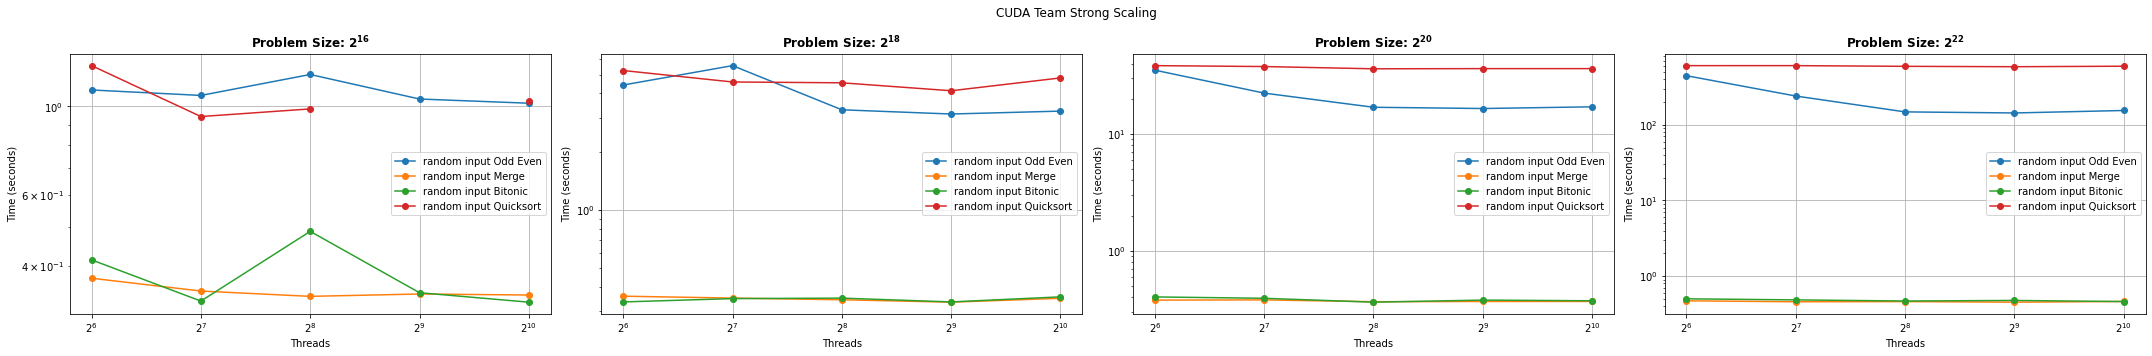

In [34]:
idx = pd.IndexSlice

fig, ax = plt.subplots(1, 4, figsize=(30, 5))
iter = 0

j = "random"

for i in num_vals1: 
    ax[iter].plot(
        ctk1.dataframe[idx[(i, j), "Avg time/rank"]].loc['main'] + ctk1.dataframe[idx[(i, j), "Avg GPU time/rank"]].loc['main'],
        marker='o',
        label = j + " input Odd Even"
    )
    ax[iter].plot(
        ctk2.dataframe[idx[(i, j), "Avg time/rank"]].loc['main'] + ctk2.dataframe[idx[(i, j), "Avg GPU Time/rank"]].loc['main'],
        marker='o',
        label = j + " input Merge"
    )
    ax[iter].plot(
        ctk3.dataframe[idx[(i, j), "Avg time/rank"]].loc['main'] + ctk3.dataframe[idx[(i, j), "Avg GPU time/rank"]].loc['main'],
        marker='o',
        label = j + " input Bitonic"
    )
    ax[iter].plot(
        ctk4.dataframe[idx[(i, j), "Avg time/rank"]].loc['main'] + ctk4.dataframe[idx[(i, j), "Avg GPU time/rank"]].loc['main'],
        marker='o',
        label = j + " input Quicksort"
    )
    ax[iter].set_title(rf"Problem Size: $\mathregular{{2^{{{str(frexp(i)[1] - 1)}}}}}$", fontsize=12, weight='bold')
    ax[iter].set_xlabel("Threads")
    ax[iter].set_ylabel("Time (seconds)")
    ax[iter].set_yscale("log", base=10)
    ax[iter].set_xscale("log", base=2)
    ax[iter].grid(True)
    ax[iter].set_xticks(threads)
    ax[iter].legend()    
    iter += 1

plt.suptitle("CUDA Team Strong Scaling")
fig.tight_layout()
plt.savefig("cuda_team_graph/strong_scaling.png")
plt.show()